<h1>Notebook Content</h1>
1. [Import Packages](#1)
1. [Helper Functions](#2)
1. [Input](#3)
1. [Model](#4)
1. [Prediction](#5)
1. [Complete Figure](#6)

<h1 id="1">1. Import Packages</h1>
Importing all necessary and useful packages in single cell.

In [3]:
import numpy as np
import keras
import tensorflow as tf
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras_tqdm import TQDMNotebookCallback
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import random
from random import randint

<h1 id="2">2. Helper Functions</h1>
Defining Some helper functions which we will need later in code

In [4]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

def plot_multi_graph(xAxis,yAxes,title='',xAxisLabel='number',yAxisLabel='Y'):
    linestyles = ['-', '--', '-.', ':']
    plt.figure()
    plt.title(title)
    plt.xlabel(xAxisLabel)
    plt.ylabel(yAxisLabel)
    for key, value in yAxes.items():
        plt.plot(xAxis, np.array(value), label=key, linestyle=linestyles[randint(0,3)])
    plt.legend()

<h1 id="3">3. Input</h1>

<h3 id="3-1">3-1. Providing Sequence</h3>
Taking a sample input sequence (a simple 1 to 100 here) in *raw_seq*

In [5]:
# define input sequence
raw_seq = [i for i in range(100)]

# Try the following if randomizing the sequence:
# random.seed('sam') # set the seed
# raw_seq = random.sample(raw_seq, 100)

# choose a number of time steps for sliding window from data start to target start
sliding_window = 20

# split into samples
X, y = split_sequence(raw_seq, sliding_window)

print(X)
print(y)

[[ 0  1  2 ... 17 18 19]
 [ 1  2  3 ... 18 19 20]
 [ 2  3  4 ... 19 20 21]
 ...
 [77 78 79 ... 94 95 96]
 [78 79 80 ... 95 96 97]
 [79 80 81 ... 96 97 98]]
[20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43
 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91
 92 93 94 95 96 97 98 99]


<h3 id="3-2">3-2. Reshaping Sequence</h3>
Reshaping accordingly for CNN Layer

In [6]:
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
n_features = 1
n_seq = 20
n_steps = 1
X = X.reshape((X.shape[0], n_seq, n_steps, n_features))

<h1 id="4">4. Model</h1>

<h3 id="4-1">4-1. Defining Layers</h3>
Adding 1D Convolution, Max Pooling, LSTM and finally Dense (MLP) layer

In [7]:
# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps, n_features)))
model.add(TimeDistributed(MaxPooling1D(pool_size=1)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

<h3 id="4-2">4-2. Training Model</h3>
Defined early stop, can be used in callbacks param of model fit, not using for now since it's not recommended at first few iterations of experimentation with new data

In [8]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
# fit model
history = model.fit(X, y, epochs=100, verbose=1, validation_data=(X,y))

Train on 80 samples, validate on 80 samples
Epoch 1/100
80/80 [==============================] - 1s 14ms/step - loss: 10784.3271 - mean_squared_error: 10784.3271 - val_loss: 7356.7844 - val_mean_squared_error: 7356.7844
Epoch 2/100
80/80 [==============================] - 0s 768us/step - loss: 6143.6844 - mean_squared_error: 6143.6844 - val_loss: 5406.3251 - val_mean_squared_error: 5406.3251
Epoch 3/100
80/80 [==============================] - 0s 764us/step - loss: 6827.9444 - mean_squared_error: 6827.9444 - val_loss: 8605.3059 - val_mean_squared_error: 8605.3059
Epoch 4/100
80/80 [==============================] - 0s 738us/step - loss: 7882.8410 - mean_squared_error: 7882.8410 - val_loss: 7101.1839 - val_mean_squared_error: 7101.1839
Epoch 5/100
80/80 [==============================] - 0s 788us/step - loss: 5373.2006 - mean_squared_error: 5373.2006 - val_loss: 4913.7211 - val_mean_squared_error: 4913.7211
Epoch 6/100
80/80 [==============================] - 0s 773us/step - loss: 6095.

Epoch 48/100
80/80 [==============================] - 0s 736us/step - loss: 2420.0616 - mean_squared_error: 2420.0616 - val_loss: 2900.6638 - val_mean_squared_error: 2900.6638
Epoch 49/100
80/80 [==============================] - 0s 708us/step - loss: 2947.6855 - mean_squared_error: 2947.6855 - val_loss: 1528.2371 - val_mean_squared_error: 1528.2371
Epoch 50/100
80/80 [==============================] - 0s 718us/step - loss: 1486.6445 - mean_squared_error: 1486.6445 - val_loss: 1184.0602 - val_mean_squared_error: 1184.0602
Epoch 51/100
80/80 [==============================] - 0s 710us/step - loss: 1343.0709 - mean_squared_error: 1343.0709 - val_loss: 1596.0367 - val_mean_squared_error: 1596.0367
Epoch 52/100
80/80 [==============================] - 0s 738us/step - loss: 1577.4470 - mean_squared_error: 1577.4470 - val_loss: 1539.1957 - val_mean_squared_error: 1539.1957
Epoch 53/100
80/80 [==============================] - 0s 753us/step - loss: 1550.0513 - mean_squared_error: 1550.0513 - 

80/80 [==============================] - 0s 715us/step - loss: 6.3454 - mean_squared_error: 6.3454 - val_loss: 5.9344 - val_mean_squared_error: 5.9344
Epoch 97/100
80/80 [==============================] - 0s 726us/step - loss: 5.9173 - mean_squared_error: 5.9173 - val_loss: 5.6929 - val_mean_squared_error: 5.6929
Epoch 98/100
80/80 [==============================] - 0s 710us/step - loss: 5.5861 - mean_squared_error: 5.5861 - val_loss: 5.4432 - val_mean_squared_error: 5.4432
Epoch 99/100
80/80 [==============================] - 0s 727us/step - loss: 5.4123 - mean_squared_error: 5.4123 - val_loss: 5.3351 - val_mean_squared_error: 5.3351
Epoch 100/100
80/80 [==============================] - 0s 714us/step - loss: 5.3405 - mean_squared_error: 5.3405 - val_loss: 5.0630 - val_mean_squared_error: 5.0630


<h3 id="4-3">4-3. Evaluating Model</h3>
Plotting Training and Validation mean square error

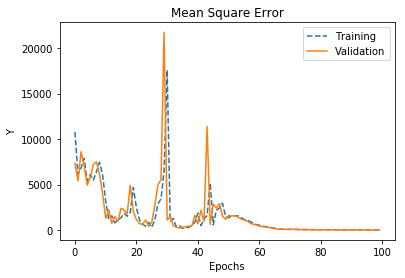

In [9]:
#Plot Error
# Mean Square Error
yAxes = {}
yAxes["Training"]=history.history['mean_squared_error']
yAxes["Validation"]=history.history['val_mean_squared_error']
plot_multi_graph(history.epoch,yAxes, title='Mean Square Error',xAxisLabel='Epochs')

<h1 id="5">5. Prediction</h1>

<h3 id="5-1">5-1. Single Value Prediction</h3>
Predicting a single value slided 20 (our provided figure for sliding window above) values ahead

In [10]:
# demonstrate prediction
x_input = array([i for i in range(100,120)])
print(x_input)
x_input = x_input.reshape((1, n_seq, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119]
[[138.98184]]


<h3 id="5-2">5-2. Sequence Prediction</h3>
Predicting complete sequence (determining closeness to target) based on data <br />
<i>change variable for any other sequence though</i>

In [11]:
# demonstrate prediction in data
yhat = model.predict(X, verbose=0)
print(yhat)

[[ 19.157822]
 [ 20.728607]
 [ 21.862343]
 [ 22.83128 ]
 [ 23.799025]
 [ 24.742914]
 [ 25.498812]
 [ 26.16366 ]
 [ 27.047453]
 [ 27.797976]
 [ 28.461855]
 [ 29.771875]
 [ 31.276567]
 [ 33.368782]
 [ 36.87359 ]
 [ 41.51239 ]
 [ 42.765923]
 [ 40.77311 ]
 [ 36.771416]
 [ 32.74667 ]
 [ 31.032404]
 [ 33.3808  ]
 [ 37.764786]
 [ 41.0561  ]
 [ 43.442924]
 [ 45.943737]
 [ 46.010307]
 [ 45.89361 ]
 [ 45.471012]
 [ 48.839108]
 [ 51.85756 ]
 [ 52.33237 ]
 [ 51.653305]
 [ 53.01493 ]
 [ 54.66563 ]
 [ 55.347645]
 [ 56.108566]
 [ 56.66783 ]
 [ 57.518456]
 [ 58.966904]
 [ 60.012302]
 [ 61.09374 ]
 [ 62.28697 ]
 [ 63.34082 ]
 [ 64.371994]
 [ 65.50542 ]
 [ 66.78604 ]
 [ 68.33212 ]
 [ 70.54985 ]
 [ 69.45406 ]
 [ 66.99953 ]
 [ 70.02045 ]
 [ 74.40192 ]
 [ 74.77475 ]
 [ 71.804   ]
 [ 72.67309 ]
 [ 74.37016 ]
 [ 76.24453 ]
 [ 78.12483 ]
 [ 79.797714]
 [ 81.55186 ]
 [ 83.50187 ]
 [ 84.26419 ]
 [ 84.40358 ]
 [ 84.63291 ]
 [ 85.12905 ]
 [ 85.95267 ]
 [ 87.120316]
 [ 88.264114]
 [ 89.44977 ]
 [ 90.50724 ]
 [ 91.

In [12]:
print(y)

[20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43
 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91
 92 93 94 95 96 97 98 99]


<h1 id="6">6. Complete Figure</h1>
Data, Target, Prediction - all in one single graph

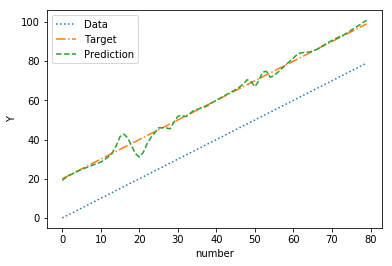

In [13]:
xAxis = [i for i in range(len(y))]
yAxes = {}
yAxes["Data"]=raw_seq[0:len(raw_seq)-sliding_window]
yAxes["Target"]=y
yAxes["Prediction"]=yhat
plot_multi_graph(xAxis,yAxes,title='')